# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Aluno**: Eduardo Garcia do Nascimento

**RA/CPF**: 22008732800


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para entendê-la melhor, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "data"

import numpy as np  # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


if __name__ == '__main__':
                       
            # importa o arquivo e guarda em um dataframe do Pandas
            set1_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set1.csv'), sep=',', low_memory=False)
            set2_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set2.csv'), sep=',', low_memory=False) 
            set3_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set3.csv'), sep=',', low_memory=False) 

            frames = [ set1_dataset, set2_dataset, set3_dataset]
            input_dataset = pd.concat(frames, axis=1)
            display(input_dataset.head(10))
            
            class_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'train.csv'), sep=',', skiprows=range(0, 1), index_col=None, header=None)
            test_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'test.csv'), sep=',', skiprows=range(0, 1), index_col=None, header=None)

            print('Dados carregados com sucesso!')
   


,Id,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,0,1.0,1.400000,1.400000,9.000000,9.000000,8.384615,8.384615,13.0,13.0,...,0.024,0.040,0.00001,2.180207,0.850000,-16.015176,0.000000,0.447179,-14.656926,0.018882
1,1,0.0,0.723971,1.000000,9.000000,8.900000,34.294117,9.222222,17.0,9.0,...,0.020,0.058,0.00001,1.867641,0.850000,-16.552813,1.781575,1.377964,-16.016694,0.025232
2,2,1.0,1.305677,1.305677,18.705883,18.705883,15.863636,15.863636,22.0,22.0,...,0.046,0.028,0.00001,2.627386,0.800000,-16.548139,0.344645,0.108658,-15.307439,-0.000148
3,3,0.0,5.141328,9.170616,1.000000,2.595238,7.166667,3.886364,48.0,44.0,...,0.226,0.030,0.00001,3.216561,0.829762,-14.697490,0.303174,0.401714,-14.083293,0.005164
4,4,1.0,0.113582,0.113582,1137.434814,1137.434814,6.600000,6.600000,40.0,40.0,...,0.084,0.050,0.00001,3.135548,0.554348,-9.595501,0.589175,0.100116,-13.572599,-0.000632
5,5,0.0,234.380325,49.266010,628.000000,10.583333,2.570318,8.292994,1287.0,628.0,...,3.914,0.038,0.00001,5.476159,0.566667,-12.069193,1.505100,0.357536,-10.992013,-0.146300
6,6,0.0,51.548214,52.099346,327.666656,162.520004,10.001031,9.875256,970.0,978.0,...,2.440,0.034,0.00001,5.852683,0.748000,-12.741077,0.000000,0.081810,-11.460218,0.000516
7,7,1.0,32.247425,32.247425,92.830185,92.830185,14.630458,14.630458,939.0,939.0,...,1.946,0.046,0.00001,5.818093,0.064151,-11.983040,1.424396,1.454859,-12.039741,-0.053146
8,8,1.0,0.526882,0.526882,1.500000,1.500000,9.600000,9.600000,5.0,5.0,...,0.054,0.056,0.00001,1.368022,0.000000,-17.207213,0.434202,1.788514,-17.173907,-0.424863
9,9,1.0,1.535825,1.535825,24.900000,24.900000,29.771931,29.771931,57.0,57.0,...,0.090,0.034,0.00001,3.436594,0.850000,-15.812102,0.957110,0.443102,-14.505732,0.004381


Dados carregados com sucesso!


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário)

Filling np arrays with dataframes sources.......................
X (60842, 308)
y (4564, 2)
X_test_index (401, 1)
Removing features with no variance....................................
(60842, 308)
(60842, 302)
(60842, 302)
(60842, 24)
Preparing Kaggle test dataset.......................................
Copying a subset of X and y with classes.............................
Replacing outliers with NaN .....................................
Replacing NaN with averages. .....................................
Balancing number of classes...............................................
Replacing outliers with NaN .....................................
Replacing NaN with averages. .....................................
END ..............................................................
Replacing outliers with NaN .....................................
Replacing NaN with averages. .....................................
END ..............................................................
Replacing outlier

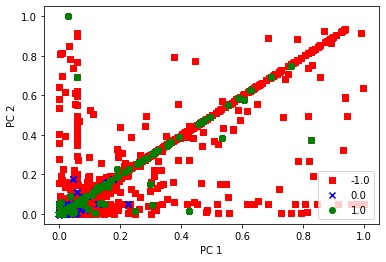


Dimensao de X_train:  (8478, 24)

Dimensao de X:  (12114, 24)

Dimensao de y_train:  (8478,)

Dimensao de y:  (12114,)

Classes do problema:  [-1.  0.  1.]

Classes do problema:  [-1.  0.  1.]


In [36]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

print('Filling np arrays with dataframes sources.......................')
X = input_dataset.iloc[:,1:].values
y = class_dataset.iloc[:,:].values
X_test_index = test_dataset.iloc[:,:].values
print('X',X.shape)
print('y',y.shape)
print('X_test_index',X_test_index.shape)

print('Removing features with no variance....................................')
print(X.shape)
variance_mask = VarianceThreshold().fit(X).get_support()
X = X[:,variance_mask]
print(X.shape)

'''
print('Replacing outliers with NaN .....................................')
df = pd.DataFrame(data=X)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = (df < (Q1 - 5 * IQR)) | (df > (Q3 + 5 * IQR))
df[mask] = np.nan
print('Replacing NaN with averages. .....................................')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())
X = df.iloc[:,:].values
'''

maskDT = [ False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, ]

mask = [ False, False, False, True, True, False, False, False, False, True, False, False, True, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, True, True, True, False, True, False, True, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False,
False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False,
True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, True, False, False, False, False, False, False, False, ]
print(X.shape)
X = X[:,mask]
print(X.shape)

#pca = PCA(2)  # project from 64 to 2 dimensions
#projected = pca.fit_transform(X)
#plt.scatter(projected[:, 0], projected[:, 1],
#            c=y, edgecolor='none', alpha=0.5,
#            cmap=plt.cm.get_cmap('spectral', 10))
#plt.xlabel('component 1')
#plt.ylabel('component 2')
#plt.colorbar();

print('Preparing Kaggle test dataset.......................................')
XKaggleTest = np.zeros((X_test_index.shape[0], X.shape[1]))
for i in range(X_test_index.shape[0]):
    XKaggleTest[i]= X[X_test_index[i][0]]


print('Copying a subset of X and y with classes.............................')
X_tmp = np.zeros((y.shape[0], X.shape[1]))
y_tmp = np.zeros(y.shape[0])

for i in range(y.shape[0]):
    X_tmp[i] = X[y[i][0]]
    y_tmp[i]= y[i][1]

X = X_tmp
y = y_tmp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print('Replacing outliers with NaN .....................................')
df = pd.DataFrame(data=X_test)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df[mask] = np.nan
print('Replacing NaN with averages. .....................................')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())
X_test = df.iloc[:,:].values

#print('Removing outliers samples...............................................')
#print(X_train.shape)
#xdf = pd.DataFrame(data=X_train)
#z = np.abs(stats.zscore(xdf))
#X_train = X_train[(z < 3).all(axis=1)]
#y_train = y_train[(z < 3).all(axis=1)]
#print(X_train.shape)
##-------------------------------------------------------
#xdf = pd.DataFrame(data=X)
#z = np.abs(stats.zscore(xdf))
#X = X[(z < 3).all(axis=1)]
#y = y[(z < 3).all(axis=1)]


print('Balancing number of classes...............................................')
xdf = pd.DataFrame(data=X_train)
ydf = pd.DataFrame(data=y_train, columns=['class'])
zdf = pd.concat([xdf,ydf], axis=1)

xdf_z = zdf[zdf['class']==0].copy()
xdf_o = zdf[zdf['class']==1].copy()
xdf_m = zdf[zdf['class']==-1].copy()

print('Replacing outliers with NaN .....................................')
Q1 = xdf_z.quantile(0.25)
Q3 = xdf_z.quantile(0.75)
IQR = Q3 - Q1
mask = (xdf_z < (Q1 - 5 * IQR)) | (xdf_z > (Q3 + 5 * IQR))
xdf_z[mask] = np.nan
print('Replacing NaN with averages. .....................................')
xdf_z = xdf_z.replace([np.inf, -np.inf], np.nan)
xdf_z = xdf_z.fillna(df.mean())
print('END ..............................................................')

print('Replacing outliers with NaN .....................................')
Q1 = xdf_o.quantile(0.25)
Q3 = xdf_o.quantile(0.75)
IQR = Q3 - Q1
mask = (xdf_o < (Q1 - 5 * IQR)) | (xdf_o > (Q3 + 5 * IQR))
xdf_o[mask] = np.nan
print('Replacing NaN with averages. .....................................')
xdf_o = xdf_o.replace([np.inf, -np.inf], np.nan)
xdf_o = xdf_o.fillna(df.mean())
print('END ..............................................................')

print('Replacing outliers with NaN .....................................')
Q1 = xdf_m.quantile(0.25)
Q3 = xdf_m.quantile(0.75)
IQR = Q3 - Q1
mask = (xdf_m < (Q1 - 5 * IQR)) | (xdf_m > (Q3 + 5 * IQR))
xdf_m[mask] = np.nan
print('Replacing NaN with averages. .....................................')
xdf_m = xdf_m.replace([np.inf, -np.inf], np.nan)
xdf_m = xdf_m.fillna(df.mean())
print('END ..............................................................')

xdf_z = resample(xdf_z, 
                 replace=True,     # sample with replacement
                 n_samples=xdf_m.shape[0],    # to match majority class
                 random_state=123) # reproducible results

xdf_o = resample(xdf_o, 
                 replace=True,     # sample with replacement
                 n_samples=xdf_m.shape[0],    # to match majority class
                 random_state=123) # reproducible results

totaldf = pd.concat([xdf_z,xdf_o,xdf_m])
y_train = totaldf['class']
X_train = totaldf.drop('class', axis=1).iloc[:,:].values

#-------------------------------------------------------


xdf = pd.DataFrame(data=X)
ydf = pd.DataFrame(data=y, columns=['class'])
zdf = pd.concat([xdf,ydf], axis=1)

xdf_z = zdf[zdf['class']==0].copy()
xdf_o = zdf[zdf['class']==1].copy()
xdf_m = zdf[zdf['class']==-1].copy()

print('Replacing outliers with NaN .....................................')
Q1 = xdf_z.quantile(0.25)
Q3 = xdf_z.quantile(0.75)
IQR = Q3 - Q1
mask = (xdf_z < (Q1 - 5 * IQR)) | (xdf_z > (Q3 + 5 * IQR))
xdf_z[mask] = np.nan
print('Replacing NaN with averages. .....................................')
xdf_z = xdf_z.replace([np.inf, -np.inf], np.nan)
xdf_z = xdf_z.fillna(df.mean())
print('END ..............................................................')

print('Replacing outliers with NaN .....................................')
Q1 = xdf_o.quantile(0.25)
Q3 = xdf_o.quantile(0.75)
IQR = Q3 - Q1
mask = (xdf_o < (Q1 - 5 * IQR)) | (xdf_o > (Q3 + 5 * IQR))
xdf_o[mask] = np.nan
print('Replacing NaN with averages. .....................................')
xdf_o = xdf_o.replace([np.inf, -np.inf], np.nan)
xdf_o = xdf_o.fillna(df.mean())
print('END ..............................................................')

print('Replacing outliers with NaN .....................................')
Q1 = xdf_m.quantile(0.25)
Q3 = xdf_m.quantile(0.75)
IQR = Q3 - Q1
mask = (xdf_m < (Q1 - 5 * IQR)) | (xdf_m > (Q3 + 5 * IQR))
xdf_m[mask] = np.nan
print('Replacing NaN with averages. .....................................')
xdf_m = xdf_m.replace([np.inf, -np.inf], np.nan)
xdf_m = xdf_m.fillna(df.mean())
print('END ..............................................................')

xdf_z = resample(xdf_z, 
                 replace=True,     # sample with replacement
                 n_samples=xdf_m.shape[0],    # to match majority class
                 random_state=123) # reproducible results

xdf_o = resample(xdf_o, 
                 replace=True,     # sample with replacement
                 n_samples=xdf_m.shape[0],    # to match majority class
                 random_state=123) # reproducible results

totaldf = pd.concat([xdf_z,xdf_o,xdf_m]).copy()
y = totaldf['class']
X = totaldf.drop('class', axis=1).iloc[:,:].values





print('Normalizing scale between 0 and 1..................................')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

print('Normalizing scale between 0 and 1..................................')
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)

print('Normalizing scale between 0 and 1..................................')
scaler = MinMaxScaler(feature_range=(0, 1))
X_test = scaler.fit_transform(X_test)

print(np.sum(y==1))
print(np.sum(y==0))
print(np.sum(y==-1))

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X[y==l, 0], 
                X[y==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

print('\nDimensao de X_train: ', X_train.shape)
print('\nDimensao de X: ', X.shape)

print('\nDimensao de y_train: ', y_train.shape)
print('\nDimensao de y: ', y.shape)

print('\nClasses do problema: ', np.unique(y_train))
print('\nClasses do problema: ', np.unique(y))

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais ensinados no curso e executando os métodos inteligentes

Train: 0.992686954470394
DT Accuracy: 0.7452554744525547
DT AUC: 0.5396256289621261
              precision    recall  f1-score   support

        -1.0       0.88      0.84      0.86      1212
         0.0       0.08      0.03      0.04        76
         1.0       0.03      0.07      0.04        82

    accuracy                           0.75      1370
   macro avg       0.33      0.31      0.31      1370
weighted avg       0.79      0.75      0.76      1370



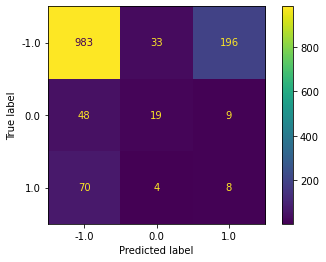

Train: 0.5181646614767634
MNB Accuracy: 0.47883211678832116
MNB AUC: 0.6283283535349684
              precision    recall  f1-score   support

        -1.0       0.91      0.49      0.63      1212
         0.0       0.16      0.45      0.23        76
         1.0       0.07      0.40      0.11        82

    accuracy                           0.48      1370
   macro avg       0.38      0.45      0.33      1370
weighted avg       0.82      0.48      0.58      1370



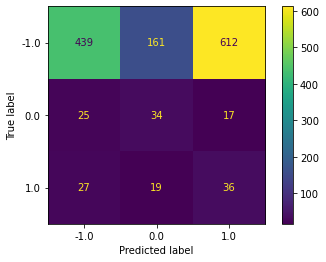

Train: 0.9393724935126209
KNN Accuracy: 0.7700729927007299
KNN AUC: 0.5475492851756293
              precision    recall  f1-score   support

        -1.0       0.89      0.86      0.87      1212
         0.0       0.13      0.08      0.10        76
         1.0       0.08      0.15      0.10        82

    accuracy                           0.77      1370
   macro avg       0.37      0.36      0.36      1370
weighted avg       0.80      0.77      0.78      1370



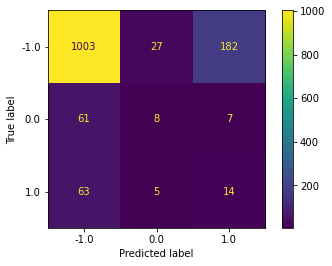

Train: 0.9202642132578438
NN Accuracy: 0.843065693430657
NN AUC: 0.6118223564172848
              precision    recall  f1-score   support

        -1.0       0.89      0.94      0.91      1212
         0.0       0.22      0.08      0.12        76
         1.0       0.16      0.12      0.14        82

    accuracy                           0.84      1370
   macro avg       0.42      0.38      0.39      1370
weighted avg       0.81      0.84      0.82      1370



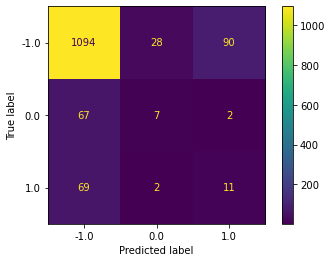

Printing model to submission.csv
Train: 0.5685303137532437
RR Accuracy: 0.4737226277372263
RR AUC: 0.6656034064574622
              precision    recall  f1-score   support

        -1.0       0.92      0.48      0.63      1212
         0.0       0.18      0.49      0.27        76
         1.0       0.06      0.43      0.11        82

    accuracy                           0.47      1370
   macro avg       0.39      0.46      0.34      1370
weighted avg       0.83      0.47      0.58      1370



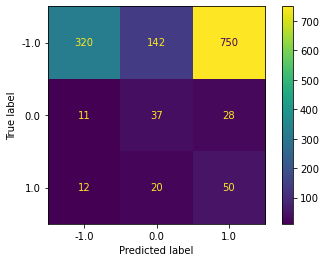

Train: 0.5425807973578675
LR Accuracy: 0.22189781021897811
LR AUC: 0.6261246912560319
              precision    recall  f1-score   support

        -1.0       0.91      0.19      0.32      1212
         0.0       0.18      0.03      0.05        76
         1.0       0.06      0.82      0.11        82

    accuracy                           0.22      1370
   macro avg       0.38      0.35      0.16      1370
weighted avg       0.82      0.22      0.29      1370



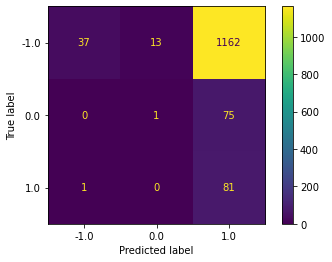

Train: 0.6718565699457419
SVM Accuracy: 0.7343065693430657
SVM AUC: 0.628633743509139
              precision    recall  f1-score   support

        -1.0       0.88      0.81      0.85      1212
         0.0       0.00      0.00      0.00        76
         1.0       0.08      0.24      0.12        82

    accuracy                           0.73      1370
   macro avg       0.32      0.35      0.32      1370
weighted avg       0.79      0.73      0.76      1370



/home/en89912/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


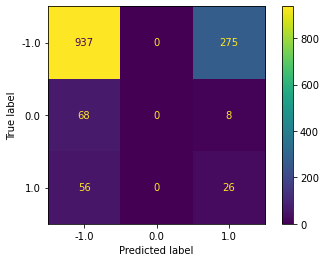

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import  plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model = DecisionTreeClassifier()
y_pred = model.fit(X_train, y_train).predict(X_train)
print("Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("DT Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X, y).predict_proba(X_test)
print("DT AUC:",metrics.roc_auc_score(y_test, y_proba,multi_class='ovo'))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()

model = MultinomialNB()
y_pred = model.fit(X_train, y_train).predict(X_train)
print("Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("MNB Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X, y).predict_proba(X_test)
print("MNB AUC:",metrics.roc_auc_score(y_test, y_proba,multi_class='ovo'))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()

model = KNeighborsClassifier()
y_pred = model.fit(X_train, y_train).predict(X_train)
print("Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X, y).predict_proba(X_test)
print("KNN AUC:",metrics.roc_auc_score(y_test, y_proba,multi_class='ovo'))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()
    
model = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(300,), random_state=1, max_iter=5000)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("NN Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X, y).predict_proba(X_test)
print("NN AUC:",metrics.roc_auc_score(y_test, y_proba,multi_class='ovo'))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()


print('Printing model to submission.csv')
y_pred_submission = model.fit(X, y).predict_proba(XKaggleTest)[:,2:3]

if True:
    model = RandomForestClassifier(max_depth=2, random_state=1)
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("RR Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X, y).predict_proba(X_test)
    print("RR AUC:",metrics.roc_auc_score(y_test, y_proba,multi_class='ovo'))
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    model = LogisticRegression(random_state=1, max_iter=15000)
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("LR Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X, y).predict_proba(X_test)
    print("LR AUC:",metrics.roc_auc_score(y_test, y_proba,multi_class='ovo'))
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    model = svm.SVC(decision_function_shape='ovo', probability=True,random_state=1)
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X, y).predict_proba(X_test)
    print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba,multi_class='ovo'))
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

result = np.zeros((X_test_index.shape[0],2))
for i in range(X_test_index.shape[0]):
    result[i][0] = X_test_index[i][0]
    result[i][1] = y_pred_submission[i]

resultdf = pd.DataFrame(data=result, columns=["Id", "Predicted"])

resultdf['Id'] = resultdf['Id'].astype(int)
resultdf['Predicted'] = resultdf['Predicted'].round(decimals=5)

resultdf.to_csv('submission.csv', index=False, float_format='%.5f')

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos e comparados, através de tabelas e gráficos